## **i. Perkenalan**

### Final Project - CODA Phase 2
**Batch**: CODA-RMT-008

**Judul**: Analisis Penargetan Subsidi Kendaraan Listrik (EV) untuk Mendorong Adopsi yang Merata di Seluruh County Berdasarkan Faktor Sosio-Ekonomi

## **ii. Identifikasi Masalah**

#### **Latar Belakang**
Pemerintah memiliki tujuan untuk mempercepat adopsi kendaraan listrik (EV) sebagai bagian dari komitmen terhadap Tujuan Pembangunan Berkelanjutan (SDGs) PBB, khususnya Goal 7 (Energi Bersih), Goal 11 (Kota Berkelanjutan), dan Goal 13 (Aksi Iklim). Namun, data saat ini menunjukkan bahwa penyebaran EV tidak merata, dengan beberapa wilayah (county) yang tertinggal jauh. Diduga, faktor sosio-ekonomi seperti Upah Minimum Regional (UMR) dan karakteristik wilayah seperti kepadatan penduduk menjadi penghalang utama.

Analisis ini bertujuan untuk mengidentifikasi wilayah-wilayah dengan tingkat penetrasi EV yang rendah, memahami hubungannya dengan faktor ekonomi, dan merekomendasikan model-model EV yang paling cocok untuk disubsidi di wilayah tersebut. Dengan demikian, program subsidi pemerintah dapat menjadi lebih tepat sasaran, efektif, dan mendorong adopsi yang lebih merata.

### **Problem Statements**
Penyebaran kendaraan listrik (EV) di Indonesia masih belum merata, dengan beberapa county menunjukkan tingkat penetrasi EV yang rendah. Kondisi ini diduga dipengaruhi oleh faktor sosio-ekonomi seperti rendahnya Upah Minimum Regional (UMR) serta karakteristik wilayah seperti kepadatan penduduk. Tanpa analisis yang tepat, kebijakan subsidi pemerintah berisiko tidak efektif dan tidak tepat sasaran. Oleh karena itu, perlu dilakukan identifikasi wilayah dengan penetrasi EV rendah, analisis hubungan dengan faktor ekonomi, serta rekomendasi model EV yang paling sesuai untuk disubsidi agar program pemerintah dapat lebih adil, efisien, dan mendorong adopsi EV secara merata.

#### **Defining the Problem Statement (Kerangka SMART)**
* **Specific**: Mengidentifikasi county dengan tingkat penetrasi EV (jumlah EV per kapita) rendah. Menganalisis karakteristik UMR dan kepadatan penduduknya, lalu merekomendasikan model EV yang terjangkau dan populer di wilayah lain dengan karakteristik serupa sebagai target subsidi.

* **Measurable**: Mengukur tingkat penetrasi EV, rata-rata UMR, kepadatan penduduk, serta pangsa pasar dan harga dari model-model EV yang relevan.

* **Achievable**: Analisis dapat dicapai menggunakan empat dataset yang disediakan (EV Population, UMR, Harga Mobil, Populasi Total) dan library Python dalam waktu yang ditentukan.

* **Relevant**: Hasil analisis akan memberikan rekomendasi langsung yang dapat digunakan untuk merancang kebijakan subsidi yang lebih efektif dan adil, mendukung SDG 10 (Mengurangi Kesenjangan) selain tujuan lingkungan.

* **Time-Bound**: Analisis diselesaikan sesuai timeline proyek untuk memberikan masukan kebijakan yang relevan.

#### **Key Questions**
1. ⁠Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: Harga Mobil, Jangkauan Listrik (Electric Range), UMR, dan Kepadatan Penduduk?

2. ⁠Bagaimana tingkat penetrasi EV di tiap county jika dibandingkan dengan total populasi, dan sejauh mana tingkat UMR di wilayah tersebut memengaruhi keterjangkauan EV?

3. ⁠Model EV apa yang paling banyak diminati, berapa harganya, dan sejauh mana harga tersebut sebanding dengan pendapatan tahunan masyarakat?

4. ⁠Apakah terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara kelompok (cluster) county yang memiliki karakteristik UMR dan kepadatan penduduk yang serupa?

## **iii. Data Loading**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Mengatur style visualisasi
sns.set_style('whitegrid')

In [59]:
# Memuat semua dataset yang dibutuhkan
ev_df = pd.read_csv('ev_final.csv')
ump_df = pd.read_csv('county_umr.csv') 
harga_df = pd.read_csv('df_price.csv')
populasi_df = pd.read_csv('total_populasi_per_county.csv')

print("Semua dataset berhasil dimuat.")

Semua dataset berhasil dimuat.


## **iv. Data Cleaning & Merging**
Pada tahap ini, kita akan membersihkan setiap dataset dan menggabungkannya menjadi satu DataFrame utama untuk analisis.

In [56]:
import pandas as pd

# Pembersihan & Persiapan Data

# Fungsi untuk menstandarkan nama kolom (lowercase, ganti spasi/titik dengan underscore)
def standardize_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
    return df

# Standarkan semua DataFrame
ev_df = standardize_columns(ev_df)
harga_df = standardize_columns(harga_df)
ump_df = standardize_columns(ump_df)
populasi_df = standardize_columns(populasi_df)

# Mengubah nama kolom spesifik agar seragam untuk merging
ev_df.rename(columns={'model': 'model', 'county': 'county', 'vin_(1-10)': 'vin'}, inplace=True)
harga_df.rename(columns={'price_2025': 'price'}, inplace=True)
ump_df.rename(columns={'value': 'min_wage'}, inplace=True)  
populasi_df.rename(columns={'pop_2025': 'population'}, inplace=True)

# Menyeragamkan format isi kolom 'county' untuk kunci gabungan
ev_df['county'] = ev_df['county'].str.upper().str.strip()
ump_df['county'] = ump_df['county'].str.upper().str.strip()
populasi_df['county'] = populasi_df['county'].str.upper().str.strip()

# Menggabungkan Data (Merging)
df_merged = pd.merge(ev_df, harga_df, on='model', how='inner')
df_merged = pd.merge(df_merged, populasi_df, on='county', how='left')
df_merged = pd.merge(df_merged, ump_df, on='county', how='left')
df_merged.dropna(inplace=True)

# Feature Engineering
ev_count_per_county = df_merged.groupby('county').size().reset_index(name='ev_count')
df_analysis = pd.merge(populasi_df, ump_df, on='county', how='inner')
df_analysis = pd.merge(df_analysis, ev_count_per_county, on='county', how='left')
df_analysis['ev_count'] = df_analysis['ev_count'].fillna(0)
df_analysis['ev_penetration_rate'] = (df_analysis['ev_count'] / df_analysis['population']) * 1000

print("Data setelah digabungkan dan semua nama kolom diseragamkan:")
print("Contoh kolom df_merged:", df_merged.columns[:5])
print("Contoh kolom df_analysis:", df_analysis.columns[:5])


Data setelah digabungkan dan semua nama kolom diseragamkan:
Contoh kolom df_merged: Index(['vin', 'model_year', 'make', 'model', 'electric_vehicle_type'], dtype='object')
Contoh kolom df_analysis: Index(['county', 'population', 'umr', 'ev_count', 'ev_penetration_rate'], dtype='object')


In [61]:
# Ubah kolom 'umr' menjadi 'avg_wage'
df_merged.rename(columns={'umr': 'avg_wage'}, inplace=True)
df_analysis.rename(columns={'umr': 'avg_wage'}, inplace=True)

# Cek hasil
print(df_merged.columns.tolist())
print(df_analysis.columns.tolist())


['vin', 'model_year', 'make', 'model', 'electric_vehicle_type', 'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range', 'base_msrp', 'county', 'popden_2025', 'category', 'city', 'state', 'postal_code', 'legislative_district', 'dol_vehicle_id', 'vehicle_location', 'electric_utility', '2020_census_tract', 'price', 'population', 'avg_wage']
['county', 'population', 'avg_wage', 'ev_count', 'ev_penetration_rate']


In [62]:
# Menampilkan 5 baris pertama dari dataframe df_merged
df_merged.head()

,vin,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,county,popden_2025,...,state,postal_code,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,price,population,avg_wage
0,1G1FZ6S07L,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,161630332,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,32500.0,55010,65042
1,1C4JJXR61P,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,241511070,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,55000.0,55010,65042
2,7FCTGAAL1N,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,205694303,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,67500.0,55010,65042
3,5YJ3E1EB9L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,ADAMS,11.19,...,WA,99344.0,9.0,127399107,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,54539.6,55010,65042
4,3FA6P0PU8G,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,ADAMS,11.19,...,WA,99344.0,9.0,259400137,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,40000.0,55010,65042


In [63]:
# Menampilkan 5 baris pertama dari dataframe df_analysis
df_analysis.head()

,county,population,avg_wage,ev_count,ev_penetration_rate
0,ADAMS,55010,65042,103,1.872387
1,ASOTIN,53965,69107,97,1.797461
2,BENTON,620895,87316,3705,5.967193
3,CHELAN,214155,78306,1711,7.989540
4,CLALLAM,189575,67999,1687,8.898853


In [64]:
# Menyimpan dataframe hasil analisis (df_analysis) ke dalam file CSV
df_analysis.to_csv('analisis_per_county.csv', index=False)

In [65]:
# Menyimpan dataframe hasil merged (df_merged) ke dalam file CSV
df_merged.to_csv('detail_ev_dengan_harga.csv', index=False)

## **v. Analisis dan Perhitungan**

Pada bagian ini, pertanyaan-pertanyaan yang telah dirumuskan akan dijawab melalui EDA, statistik deskriptif, dan inferensial.

### **1. ⁠Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: Harga Mobil, Jangkauan Listrik (Electric Range), UMR, dan Kepadatan Penduduk?**

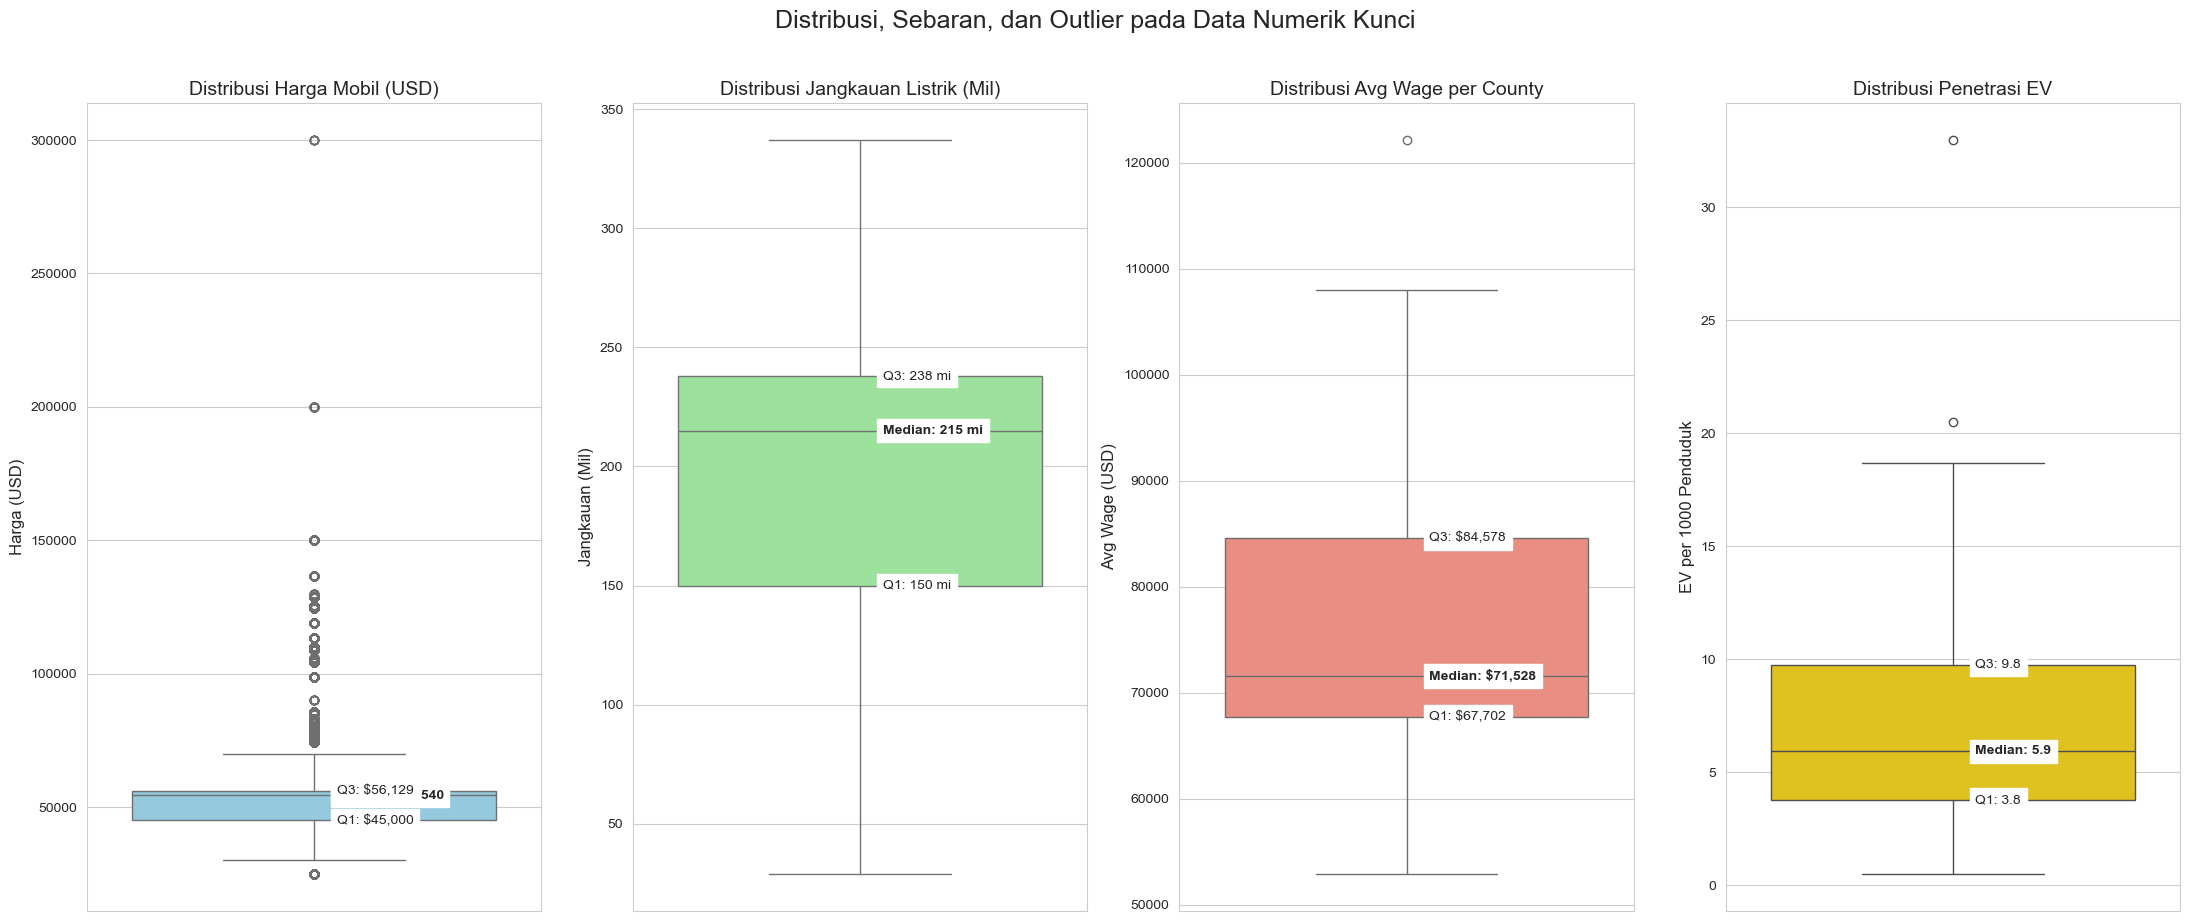

--- Statistik Deskriptif Detail (Data EV & Harga) ---
               price  electric_range
count  284753.000000   284753.000000
mean    56553.537607       38.519025
std     19374.017592       79.262287
min     25000.000000        0.000000
25%     45000.000000        0.000000
50%     54539.600000        0.000000
75%     56129.060000       30.000000
max    300000.000000      337.000000

--- Statistik Deskriptif Detail (Data Analisis per County) ---
            avg_wage    population  ev_penetration_rate
count      39.000000  3.900000e+01            39.000000
mean    76363.384615  5.533600e+05             8.073190
std     14832.480705  1.204072e+06             6.366205
min     52893.000000  5.995000e+03             0.500417
25%     67702.000000  5.452750e+04             3.768054
50%     71528.000000  1.740750e+05             5.925638
75%     84578.000000  4.856575e+05             9.753735
max    122148.000000  6.984875e+06            32.977789


In [68]:
plt.figure(figsize=(22, 9))
plt.suptitle('Distribusi, Sebaran, dan Outlier pada Data Numerik Kunci', fontsize=18, y=1.02)

# 1. Boxplot untuk Harga Mobil
ax1 = plt.subplot(1, 4, 1)
sns.boxplot(y=df_merged['price'], ax=ax1, color='skyblue')
ax1.set_title('Distribusi Harga Mobil (USD)', fontsize=14)
ax1.set_ylabel('Harga (USD)', fontsize=12)

price_stats = df_merged['price'].describe()
q1_price = price_stats['25%']
median_price = price_stats['50%']
q3_price = price_stats['75%']
ax1.text(0.05, q1_price, f'Q1: ${q1_price:,.0f}', va='center', ha='left', backgroundcolor='white')
ax1.text(0.05, median_price, f'Median: ${median_price:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax1.text(0.05, q3_price, f'Q3: ${q3_price:,.0f}', va='center', ha='left', backgroundcolor='white')


# 2. Boxplot untuk Jangkauan Listrik
ax2 = plt.subplot(1, 4, 2)
bev_range_data = df_merged[(df_merged['electric_vehicle_type'] == 'Battery Electric Vehicle (BEV)') & (df_merged['electric_range'] > 0)]
sns.boxplot(y=bev_range_data['electric_range'], ax=ax2, color='lightgreen')
ax2.set_title('Distribusi Jangkauan Listrik (Mil)', fontsize=14)
ax2.set_ylabel('Jangkauan (Mil)', fontsize=12)

range_stats = bev_range_data['electric_range'].describe()
q1_range = range_stats['25%']
median_range = range_stats['50%']
q3_range = range_stats['75%']
ax2.text(0.05, q1_range, f'Q1: {q1_range:.0f} mi', va='center', ha='left', backgroundcolor='white')
ax2.text(0.05, median_range, f'Median: {median_range:.0f} mi', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax2.text(0.05, q3_range, f'Q3: {q3_range:.0f} mi', va='center', ha='left', backgroundcolor='white')


# 3. Boxplot untuk Avg Wage (sebelumnya UMR)
ax3 = plt.subplot(1, 4, 3)
sns.boxplot(y=df_analysis['avg_wage'], ax=ax3, color='salmon')
ax3.set_title('Distribusi Avg Wage per County', fontsize=14)
ax3.set_ylabel('Avg Wage (USD)', fontsize=12)

avg_wage_stats = df_analysis['avg_wage'].describe()
q1_wage = avg_wage_stats['25%']
median_wage = avg_wage_stats['50%']
q3_wage = avg_wage_stats['75%']
ax3.text(0.05, q1_wage, f'Q1: ${q1_wage:,.0f}', va='center', ha='left', backgroundcolor='white')
ax3.text(0.05, median_wage, f'Median: ${median_wage:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax3.text(0.05, q3_wage, f'Q3: ${q3_wage:,.0f}', va='center', ha='left', backgroundcolor='white')


# 4. Boxplot untuk Tingkat Penetrasi EV
ax4 = plt.subplot(1, 4, 4)
sns.boxplot(y=df_analysis['ev_penetration_rate'], ax=ax4, color='gold')
ax4.set_title('Distribusi Penetrasi EV', fontsize=14)
ax4.set_ylabel('EV per 1000 Penduduk', fontsize=12)

pen_stats = df_analysis['ev_penetration_rate'].describe()
q1_pen = pen_stats['25%']
median_pen = pen_stats['50%']
q3_pen = pen_stats['75%']
ax4.text(0.05, q1_pen, f'Q1: {q1_pen:.1f}', va='center', ha='left', backgroundcolor='white')
ax4.text(0.05, median_pen, f'Median: {median_pen:.1f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax4.text(0.05, q3_pen, f'Q3: {q3_pen:.1f}', va='center', ha='left', backgroundcolor='white')


plt.tight_layout()
plt.show()

# Statistik deskriptif detail
print("--- Statistik Deskriptif Detail (Data EV & Harga) ---")
print(df_merged[['price', 'electric_range']].describe())
print("\n--- Statistik Deskriptif Detail (Data Analisis per County) ---")
print(df_analysis[['avg_wage', 'population', 'ev_penetration_rate']].describe())


# Interpretasi Analisis Data EV & Sosio-Ekonomi per County

Analisis ini menyoroti gambaran harga dan performa EV, serta kondisi sosio-ekonomi per county. Hal ini penting untuk merancang strategi subsidi dan penetrasi EV yang lebih tepat sasaran.

## 1. Data EV & Harga (df_merged)

- **Harga Mobil (price):**
  - Rata-rata harga EV adalah **$56.554**, dengan median **$54.540**, menunjukkan distribusi harga cenderung merata dengan sedikit condong ke harga rendah.
  - Sebanyak 50% EV berada di rentang **$45.000 – $56.129**, menunjukkan pasar menengah cukup luas.
  - Harga terendah $25.000 dan tertinggi $300.000 menegaskan adanya segmentasi pasar: EV terjangkau vs EV premium.

- **Jangkauan Listrik (electric_range):**
  - Median jangkauan tercatat **0 mil**, kemungkinan karena dominasi data PHEV atau entri data yang tidak lengkap.
  - Nilai maksimum **337 mil**, menunjukkan ada model EV dengan performa baterai tinggi. Analisis lebih akurat membutuhkan pemisahan antara PHEV dan BEV.

## 2. Data Analisis per County (df_analysis)

- **Avg Wage (avg_wage):**
  - Rata-rata upah per county adalah **$76.363**, dengan rentang tengah (Q1–Q3) **$67.702 – $84.578**.
  - Terdapat county dengan upah tinggi (maksimum $122.148), kemungkinan berkorelasi dengan adopsi EV lebih tinggi.

- **Tingkat Penetrasi EV (ev_penetration_rate):**
  - Rata-rata **8.07 EV per 1000 penduduk**, median **5.93**, rentang sangat lebar (0.50 – 32.98).
  - Ini mengonfirmasi adopsi EV tidak merata: beberapa county sangat tinggi (outlier), mayoritas masih rendah.

## Kesimpulan untuk Strategi Subsidi

- Harga EV dan avg_wage sangat bervariasi, sehingga kebijakan subsidi harus **targeted**, bukan seragam.
- Subsidi sebaiknya difokuskan pada county dengan **avg_wage di bawah median** dan penetrasi EV rendah.
- Model EV yang direkomendasikan berada di **rentang harga bawah–menengah** (~$45.000–$56.000 ke bawah).
- Untuk county dengan avg_wage tinggi dan penetrasi EV besar, insentif lebih efektif dialihkan ke **infrastruktur charging** atau **model EV dengan jangkauan panjang**, bukan subsidi harga langsung.


### **2. Bagaimana tingkat penetrasi EV di tiap county jika dibandingkan dengan total populasi, dan sejauh mana tingkat rata rata gaji di wilayah tersebut memengaruhi keterjangkauan EV?**

/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_1092/1139763050.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_1092/1139763050.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='ev_penetration_rate', y='county', data=bottom_5_penetration,


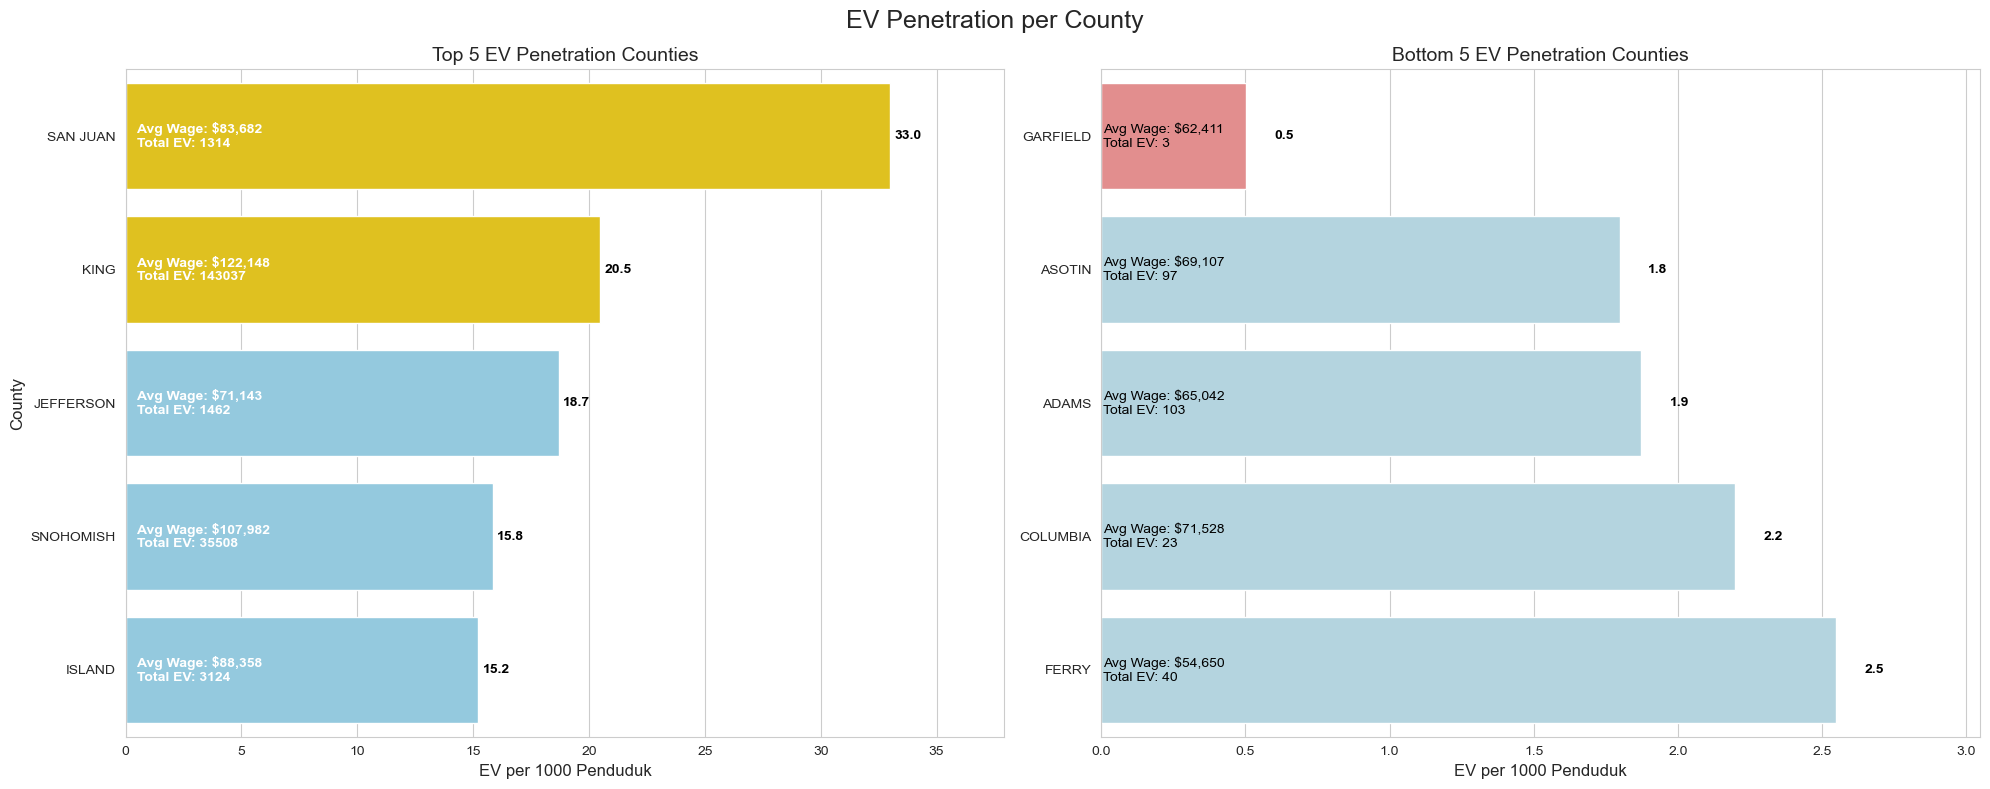

In [70]:
# Ambil top 5 dan bottom 5 penetration
top_5_penetration = df_analysis.nlargest(5, 'ev_penetration_rate')
bottom_5_penetration = df_analysis.nsmallest(5, 'ev_penetration_rate')

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle('EV Penetration per County', fontsize=18)

# --- Top 5 Penetrasi ---
colors_top = ['gold' if i < 2 else 'skyblue' for i in range(len(top_5_penetration))]

ax1 = sns.barplot(
    x='ev_penetration_rate', 
    y='county', 
    data=top_5_penetration,
    ax=axes[0], 
    palette=colors_top, 
    dodge=False
)

ax1.set_title('Top 5 EV Penetration Counties', fontsize=14)
ax1.set_xlabel('EV per 1000 Penduduk', fontsize=12)
ax1.set_ylabel('County', fontsize=12)

for i, (p_rate, avg_wage, ev_count) in enumerate(zip(
        top_5_penetration['ev_penetration_rate'], 
        top_5_penetration['avg_wage'], 
        top_5_penetration['ev_count']
    )):
    ax1.text(0.5, i, f'Avg Wage: ${avg_wage:,.0f}\nTotal EV: {ev_count}', 
             color='white', va='center', ha='left', fontweight='bold')
    ax1.text(p_rate + 0.2, i, f'{p_rate:.1f}', 
             color='black', va='center', fontweight='bold')

ax1.set_xlim(right=top_5_penetration['ev_penetration_rate'].max() * 1.15)



# --- Bottom 5 Penetrasi ---
colors_bottom = ['lightcoral' if i==0 else 'lightblue' for i in range(len(bottom_5_penetration))]
ax2 = sns.barplot(x='ev_penetration_rate', y='county', data=bottom_5_penetration,
                  ax=axes[1], palette=colors_bottom, dodge=False)
ax2.set_title('Bottom 5 EV Penetration Counties', fontsize=14)
ax2.set_xlabel('EV per 1000 Penduduk', fontsize=12)
ax2.set_ylabel('')

for i, (p_rate, avg_wage, ev_count) in enumerate(zip(bottom_5_penetration['ev_penetration_rate'], 
                                                      bottom_5_penetration['avg_wage'], 
                                                      bottom_5_penetration['ev_count'])):
    ax2.text(0.005, i, f'Avg Wage: ${avg_wage:,.0f}\nTotal EV: {ev_count}', color='black', va='center', ha='left')
    ax2.text(p_rate + 0.1, i, f'{p_rate:.1f}', color='black', va='center', fontweight='bold')
ax2.set_xlim(right=bottom_5_penetration['ev_penetration_rate'].max() + 0.5)

plt.tight_layout()
plt.show()


**Interpretasi:**

Grafik ini memperlihatkan perbandingan tingkat penetrasi kendaraan listrik (EV), yang diukur sebagai jumlah EV per 1000 penduduk, antara 5 county dengan tingkat tertinggi dan 5 county dengan tingkat terendah.

**Analisis Penetrasi EV di Top 5 & Bottom 5 County**
** Top 5 EV Penetration Counties**
- **San Juan**  
  Memimpin dengan penetrasi EV tertinggi, yaitu **33 EV per 1000 penduduk** (total EV: 1.314 unit). UMR tercatat sebesar **$83.682** (relatif tinggi), menunjukkan daya beli cukup mendukung adopsi EV.

- **King County**  
  Penetrasi EV **20,5 per 1000 penduduk** dengan **UMR tertinggi** di antara top 5 (**$122.148**). Total EV sangat besar (**143.037 unit**), menandakan konsentrasi pasar EV yang signifikan.

- **Jefferson, Snohomish, Island**  
  Penetrasi EV antara **15–19 per 1000 penduduk** dengan UMR bervariasi **$71.143–$107.982**, menunjukkan adopsi EV signifikan seiring kemampuan ekonomi lokal yang relatif kuat.

**Insight:**  Top 5 county menunjukkan korelasi positif antara UMR tinggi dan penetrasi EV tinggi


**Bottom 5 EV Penetration Counties**

- **Garfield**  
  Penetrasi EV terendah: **0,5 per 1000 penduduk** (total EV: 3 unit). UMR **$62.411**, menandakan daya beli terbatas sehingga adopsi EV rendah wajar terjadi.

- **Asotin, Adams, Columbia, Ferry**  
  Penetrasi EV **1,8–2,5 per 1000 penduduk**, UMR rendah hingga sedang **($54.650–$71.528)**, total EV rendah **(23–103 unit)**.

**Insight:**  Bottom 5 county menunjukkan penetrasi EV rendah karena daya beli terbatas dan jumlah EV sedikit. 

**Kesimpulan**
Terdapat kesenjangan penetrasi EV signifikan antara top 5 dan bottom 5 county. Strategi diferensial diperlukan:
- **Top 5 County:** Fokus pada infrastruktur charging, edukasi EV, dan perluasan model EV premium/jangkauan jauh, agar masyarakat lebih mudah mengakses kendaraan listrik dan terdorong untuk beralih ke EV secara konsisten.
- **Bottom 5 County:** Fokus pada subsidi harga, edukasi, dan program awareness untuk meningkatkan adopsi awal.  

### **⁠3. Model EV apa yang paling banyak diminati, berapa harganya, dan sejauh mana harga tersebut sebanding dengan pendapatan tahunan masyarakat?**

Studi kasus menggunakan King County karena wilayah ini memiliki total EV terbesar di antara top 5 county (143.037 unit) sekaligus UMR tertinggi ($122.148), menjadikannya representasi ideal untuk memahami perilaku pasar EV di area berpendapatan tinggi.

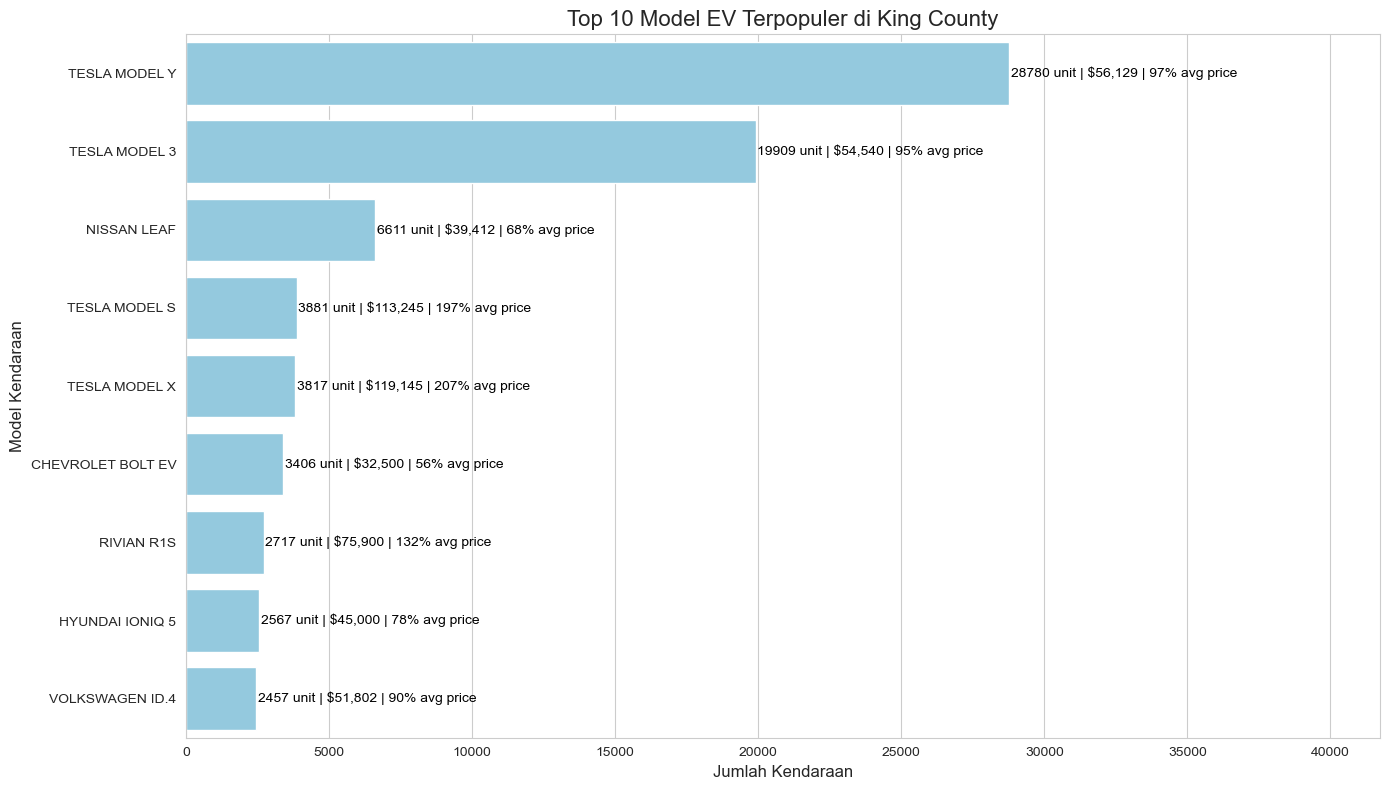

Rata-rata Harga EV (avg_price) King County: $57,588

Model EV terpopuler di King County dengan perbandingan harga vs avg_price:
            make_model      price  count  avg_price_perc
152      TESLA MODEL Y   56129.06  28780       97.467043
149      TESLA MODEL 3   54539.60  19909       94.706976
131        NISSAN LEAF   39412.00   6611       68.438187
150      TESLA MODEL S  113244.60   3881      196.647090
151      TESLA MODEL X  119144.60   3817      206.892327
39   CHEVROLET BOLT EV   32500.00   3406       56.435631
140         RIVIAN R1S   75900.00   2717      131.798904
72     HYUNDAI IONIQ 5   45000.00   2567       78.141642
73     HYUNDAI IONIQ 5   51802.00   2567       89.953186
162    VOLKSWAGEN ID.4   40000.00   2457       69.459238


In [74]:
# 1. Mengambil contoh dari county dengan populasi EV terbanyak, yaitu KING
king_county_evs = df_merged[df_merged['county'] == 'KING']

# 2. Hitung model terpopuler (top 10) dengan harga
top_models_king = (
    king_county_evs
    .groupby(['make', 'model', 'price'])
    .size()
    .reset_index(name='count')
    .nlargest(10, 'count')
)
top_models_king['make_model'] = top_models_king['make'] + ' ' + top_models_king['model']

# 3. Hitung rata-rata harga EV King County (avg_price)
avg_price_king = king_county_evs['price'].mean()

# 4. Tambahkan kolom perbandingan harga EV dengan avg_price
top_models_king['avg_price_perc'] = (top_models_king['price'] / avg_price_king) * 100

# 5. Visualisasi dengan harga & count, semua warna sky blue
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='count',
    y='make_model',
    data=top_models_king,
    color='skyblue'  # semua bar berwarna sama
)
plt.title('Top 10 Model EV Terpopuler di King County', fontsize=16)
plt.xlabel('Jumlah Kendaraan', fontsize=12)
plt.ylabel('Model Kendaraan', fontsize=12)

# Tambahkan label jumlah unit + harga + persentase terhadap avg_price
for index, bar in enumerate(ax.patches):
    count = bar.get_width()  # jumlah unit
    price = top_models_king['price'].iloc[index]
    perc = top_models_king['avg_price_perc'].iloc[index]
    y_pos = bar.get_y() + bar.get_height() / 2

    ax.text(
        count + 50,
        y_pos,
        f"{int(count)} unit | ${price:,.0f} | {perc:.0f}% avg price",
        color='black',
        va='center'
    )

# Sesuaikan batas sumbu X supaya label muat
ax.set_xlim(right=top_models_king['count'].max() * 1.45)

plt.tight_layout()
plt.show()

# 6. Tampilkan tabel ringkasan
print(f"Rata-rata Harga EV (avg_price) King County: ${avg_price_king:,.0f}\n")
print("Model EV terpopuler di King County dengan perbandingan harga vs avg_price:")
print(top_models_king[['make_model', 'price', 'count', 'avg_price_perc']])


**Interpretasi:**

Rata-rata harga EV di King County adalah **$57.588**, yang menjadi patokan untuk menilai seberapa mahal atau murah suatu model relatif terhadap pasar lokal. Dari top 10 model terpopuler terlihat pola berikut:

- **Dominasi Tesla Model Y & Model 3**  
  Kedua model ini menempati posisi teratas dengan total unit masing-masing **28.780** dan **19.909**, harganya **97–95% dari rata-rata harga EV**, menunjukkan bahwa masyarakat lebih menyukai model EV yang mendekati harga rata-rata pasar, relatif terjangkau namun tetap premium.

- **Model harga lebih rendah**  
  Nissan Leaf (**$39.412, 68% avg_price**) dan Chevrolet Bolt EV (**$32.500, 56% avg_price**) menunjukkan permintaan stabil untuk model EV entry-level atau ekonomis. Meskipun harganya lebih rendah dari rata-rata, jumlah unitnya tetap signifikan (**3.406–6.611 unit**), menandakan segmen harga menengah-bawah juga penting.

- **Model harga premium tinggi**  
  Tesla Model S (**$113.245, 197% avg_price**) dan Model X (**$119.145, 207% avg_price**) memiliki permintaan lebih terbatas (**3.817–3.881 unit**), tetapi tetap diminati oleh konsumen dengan daya beli tinggi. Hal ini menunjukkan model memiliki niche market premium untuk fitur atau prestige tertentu. 

**Kesimpulan untuk Meningkatkan Pasar EV di King County/ Daerah dengan UMR Tinggi**

Dikarenakan King County memiliki **pendapatan tinggi** dan total EV yang sangat besar, strategi subsidi harga tidak terlalu diperlukan. Sebaliknya, fokus strategi sebaiknya diarahkan pada:

1. **Fokus pada segmen mid-range**  : Model EV yang harganya mendekati rata-rata (**Tesla Model Y & Model 3, Hyundai Ioniq 5, Volkswagen ID.4**) memiliki penjualan terbanyak.  

2. **Jaga keberadaan model entry-level**  : Model seperti **Nissan Leaf dan Chevrolet Bolt EV** tetap diminati meski harganya lebih rendah sehingga ketersediaan stok harus diperhatikan dan edukasi manfaat EV ekonomis harus dilakukan agar segmen harga menengah-bawah tetap berkembang.

3. **Pertahankan segmen premium** :  **Tesla Model S & X** diminati oleh konsumen high-income, meski jumlahnya lebih kecil dengan kembangkan layanan premium, paket leasing/financing fleksibel, dan edukasi fitur canggih untuk mempertahankan pasar niche.

4. **Sesuaikan strategi harga dengan daya beli lokal**  : Menggunakan rata-rata harga EV (**$57.588**) sebagai patokan, pastikan model baru tidak terlalu jauh dari harga pasar, kecuali untuk segmen premium.  

6. **Kembangkan infrastruktur & edukasi**  : Meski King County berpendapatan tinggi, kemudahan akses charging dan edukasi tentang EV tetap penting untuk mendorong adopsi lebih luas, termasuk bagi model mid-range dan entry-level.


### **4. Selain UMR, faktor-faktor apa yang paling mempengaruhi penetrasi EV di tiap county?**


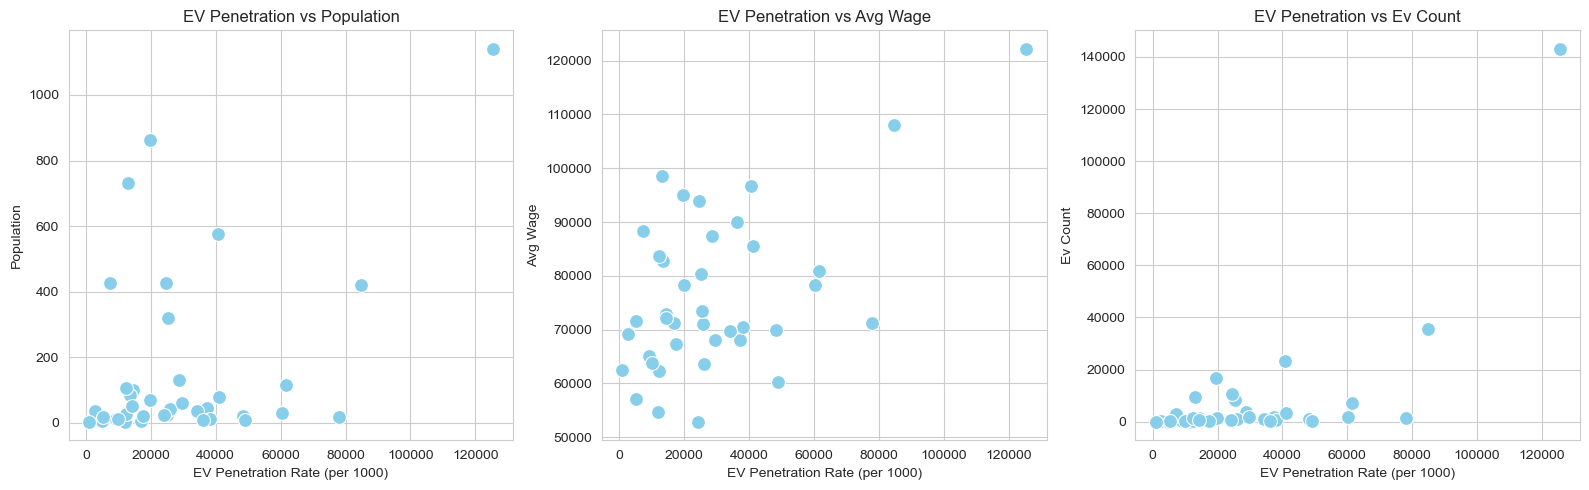

Korelasi EV Penetration Rate vs Faktor-faktor Lain:
       Factor  Correlation_with_EV_Penetration
0  population                             0.41
1    avg_wage                             0.53
2    ev_count                             0.70


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faktor-faktor yang ingin dibandingkan dengan EV penetration rate
factors = ['population', 'avg_wage', 'ev_count']

# Ukuran figure
plt.figure(figsize=(16, 5))

for i, factor in enumerate(factors, 1):
    plt.subplot(1, len(factors), i)
    sns.scatterplot(
        x='ev_penetration_rate',
        y=factor,
        data=df_county,
        color='skyblue',
        s=100
    )
    plt.xlabel('EV Penetration Rate (per 1000)')
    plt.ylabel(factor.replace('_', ' ').title())
    plt.title(f'EV Penetration vs {factor.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Hitung korelasi EV Penetration vs faktor-faktor lain
corr_factors = df_county[['ev_penetration_rate', 'population', 'avg_wage', 'ev_count']].corr()['ev_penetration_rate'].drop('ev_penetration_rate').round(2)

# Konversi ke dataframe supaya lebih rapi
corr_table = corr_factors.reset_index()
corr_table.columns = ['Factor', 'Correlation_with_EV_Penetration']

print("Korelasi EV Penetration Rate vs Faktor-faktor Lain:")
print(corr_table)


**Interpretasi Korelasi EV Penetration dengan population, avg_wage dan ev_count:**

1. **Total EV (`ev_count`) → corr 0.70**  
   Jumlah EV yang tersedia di suatu county adalah faktor utama yang memengaruhi penetrasi EV. Semakin banyak kendaraan listrik yang ada, semakin tinggi penetrasi per 1000 penduduk. Dengan kata lain, **supply EV langsung menentukan seberapa cepat adopsi di masyarakat**.

2. **Pendapatan rata-rata (`avg_wage`) → 0.53**  
   Daya beli masyarakat juga memainkan peran signifikan. County dengan pendapatan tinggi cenderung memiliki penetrasi EV lebih tinggi karena penduduk mampu membeli EV. Dengan demikian, **tingginya pendapatan mendorong permintaan EV**.

3. **Populasi (`population`) → 0.41**  
   Meskipun county besar biasanya memiliki total EV lebih banyak, korelasinya lebih rendah dibandingkan `ev_count` dan `avg_wage`. Artinya, **jumlah penduduk besar saja tidak menjamin penetrasi tinggi**, karena distribusi EV per 1000 penduduk bisa tetap rendah.

**Kesimpulan:**

- Untuk meningkatkan penetrasi EV, fokus utama adalah **menambah jumlah EV (supply)** agar efeknya terasa langsung pada penetrasi per 1000 penduduk.  
- **Menyesuaikan strategi harga atau insentif dengan daya beli** menjadi penting untuk mendorong adopsi di county dengan pendapatan menengah atau rendah.  
- County besar perlu strategi distribusi yang lebih baik agar penetrasi per 1000 penduduk meningkat merata.  
- County berpendapatan tinggi bisa lebih cepat mengadopsi EV, sehingga fokus bisa diarahkan pada **efektivitas model** dan **pengembangan infrastruktur**.


### **5. Apakah EV yang dibeli di county dengan UMR tinggi memiliki electric range (jarak tempuh) lebih besar dibandingkan EV yang dibeli di county dengan UMR rendah?**

Median avg_wage: $122,148.00
T-Statistic: -5.5536
P-value: 0.0000


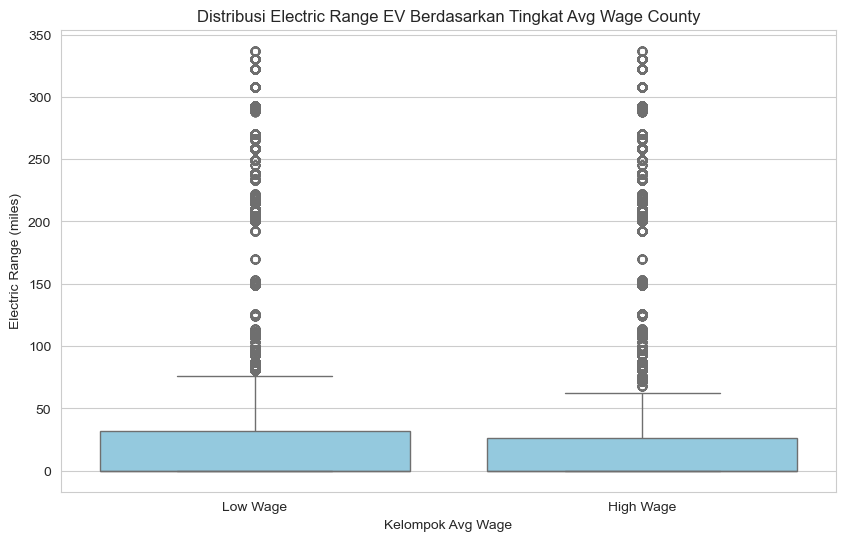

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- Tentukan median avg_wage untuk membagi grup ---
median_wage = df_merged['avg_wage'].median()
print(f"Median avg_wage: ${median_wage:,.2f}")

# --- Buat kolom grup berdasarkan avg_wage ---
df_merged['wage_group'] = df_merged['avg_wage'].apply(lambda x: 'High Wage' if x >= median_wage else 'Low Wage')

# --- Pisahkan data electric range per grup ---
high_wage_evs = df_merged[df_merged['wage_group'] == 'High Wage']['electric_range']
low_wage_evs  = df_merged[df_merged['wage_group'] == 'Low Wage']['electric_range']

# --- Hipotesis ---
# H0: Rata-rata electric range sama antar grup
# H1: Rata-rata electric range berbeda antar grup

# --- Lakukan t-test (Welch's t-test) ---
t_stat, p_value = stats.ttest_ind(high_wage_evs, low_wage_evs, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# --- Visualisasi distribusi electric range per grup ---
plt.figure(figsize=(10,6))
sns.boxplot(
    x='wage_group',
    y='electric_range',
    data=df_merged,
    color='skyblue'
)
plt.title('Distribusi Electric Range EV Berdasarkan Tingkat Avg Wage County')
plt.xlabel('Kelompok Avg Wage')
plt.ylabel('Electric Range (miles)')
plt.show()




**Median avg_wage:** $122,148.00  
**T-Statistic:** -5.5536  
**P-value:** 0.0000  

**Interpretasi**  
Hasil t-test menunjukkan bahwa county dengan pendapatan tinggi (**High Wage**) membeli EV dengan **electric range lebih besar** dibanding county berpendapatan rendah (**Low Wage**). Nilai **T-Statistic negatif** menandakan arah perbedaan ini, sedangkan **P-value yang sangat kecil** menegaskan bahwa perbedaan ini **signifikan secara statistik**.

**Kesimpulan**  
- Pendapatan rata-rata (**avg_wage**) memengaruhi **pilihan EV**, terutama terkait **jangkauan (electric range)** yang dibeli masyarakat.  
- County berpendapatan tinggi cenderung memilih **EV premium atau jangkauan jauh**, sementara county berpendapatan rendah lebih memilih **EV entry-level dengan jangkauan lebih pendek**.  

**Rekomendasi**  
- **High Wage County:** Fokus pada pengembangan **infrastruktur charging** skala kota, promosi EV jangkauan jauh, dan penyediaan model premium agar penetrasi EV terus meningkat.  
- **Low Wage County:** Prioritaskan **EV entry-level** yang lebih terjangkau, sambil menjalankan **program edukasi, awareness, dan insentif harga**, sehingga masyarakat bisa mengadopsi EV sesuai kemampuan ekonomi.  
- Strategi ini membantu memastikan penetrasi EV meningkat **secara merata**, sekaligus menyesuaikan dengan **daya beli regional**.


**Kesimpulan dan Rekomendasi  Analisis EV & Sosio-Ekonomi per County**

Berdasarkan analisis harga EV, penetrasi, dan faktor sosio-ekonomi per county, berikut rangkuman insight, kesimpulan, dan rekomendasi strategis:

**1. Insight Utama**

- **Distribusi Harga EV:**  
  Harga rata-rata EV: **$56.554**, median **$54.540**. Pasar menengah ($45.000–$56.129) cukup luas, sementara EV premium (> $100.000) memiliki permintaan terbatas namun stabil.

- **Dominasi Model Terpopuler:**  
  Di King County, Tesla Model Y & Model 3 mendominasi, dengan harga mendekati rata-rata pasar, menunjukkan konsumen lebih suka EV premium namun terjangkau. EV entry-level (Nissan Leaf, Chevrolet Bolt EV) tetap penting bagi segmen menengah-bawah, sementara EV premium (Tesla S & X) menyasar niche market.

- **Korelasi Penetrasi EV:**  
  - **ev_count → 0.70**, faktor paling kuat: supply EV menentukan penetrasi.  
  - **avg_wage → 0.53**, daya beli mendorong permintaan EV.  
  - **population → 0.41**, populasi besar tidak otomatis menjamin penetrasi tinggi.

- **Pengaruh Pendapatan terhadap Pilihan EV:**  
  T-test antara High Wage vs Low Wage county menunjukkan:  
  - County dengan pendapatan tinggi membeli EV dengan **electric range lebih besar**.  
  - P-value = 0.0000 → perbedaan signifikan secara statistik.  
  - Menandakan pendapatan memengaruhi tipe EV yang dipilih.

**2. Kesimpulan**

- **Supply EV** merupakan faktor utama penetrasi; semakin banyak EV tersedia, penetrasi per 1000 penduduk meningkat.  
- **Daya beli (avg_wage)** memengaruhi tidak hanya penetrasi, tapi juga tipe EV yang dibeli (jangkauan & harga).  
- **Populasi** berpengaruh lebih kecil; distribusi EV merata lebih penting daripada jumlah penduduk semata.  
- **Segmentasi pasar** jelas: county berpendapatan tinggi cenderung mengadopsi EV premium, sedangkan county berpendapatan rendah lebih memilih EV entry-level.

**3. Rekomendasi**

- **High Wage County:**  
  Fokus pada **infrastruktur charging skala kota**, promosikan EV premium/jangkauan jauh, dan optimalkan distribusi EV agar penetrasi terus meningkat.

- **Low Wage County:**  
  Prioritaskan **EV entry-level** dengan harga terjangkau, jalankan **program edukasi dan awareness** serta insentif harga untuk mendorong adopsi, dan pastikan distribusi EV merata agar penetrasi per 1000 penduduk meningkat.

- **Peningkatan Supply EV:**  
  Tingkatkan stok EV di seluruh county, terutama yang penetrasinya rendah. Program fleet EV dan kerja sama dealer bisa mempercepat distribusi.

- **Strategi Harga dan Insentif Tersegmentasi:**  
  Sesuaikan subsidi, potongan pajak, atau skema pembiayaan dengan **daya beli regional**. County menengah-rendah bisa mendapat insentif langsung, sedangkan county tinggi lebih diarahkan ke **infrastruktur dan layanan EV premium**.

- **Edukasi dan Awareness:**  
  Kampanye EV, demo kendaraan, dan test drive untuk meningkatkan adopsi. Fokus pada **benefit jangka panjang EV** agar masyarakat lebih cepat beralih dari kendaraan konvensional.

**Kesimpulan Akhir:**  
Strategi penetrasi EV yang efektif harus **menyeimbangkan supply, daya beli, dan distribusi merata**, sambil menyesuaikan **model dan insentif dengan karakteristik sosio-ekonomi** tiap county. Dengan pendekatan ini, penetrasi EV dapat meningkat secara berkelanjutan dan merata di seluruh wilayah.
